### Table of contents:
- Gather
- Wrangle
- Storing, Analyzing and Visualizing

### Gather

In [ ]:
import pandas as pd 
import numpy as np
import requests
import json
import tweepy
import os
import pprint as pp

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
import os
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

             

In [5]:

with open('image-predictions.tsv', mode= 'wb') as file:
    file.write(response.content)
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [7]:
consumer_key= 'bKGx6l18ZswSV3xwFdAt4uEYz'
consumer_secret = 'hiFMxRvmOBDHXDtDGUVWGninB2GSxBNKogFg38SNkrScjIyzNB'
access_token = '1073467004495945728-do3vFZpiT1gnAUGmP1xmHd5RRjw1SC'
access_secret = 'H8rQy9prEJe3zse3XHFPvm3HU2thpau54nbRi9hD8BI43'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [8]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [9]:
count = 0
fails_dict = {}
start = timer()
df_2 = []
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count+=1
        print(str(count)+":"+ str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass 
    end = timer()
    print(end-start)
    print(fails_dict)

1:892420643555336193
Success
2:892177421306343426
Success
3:891815181378084864
Success
4:891689557279858688
Success
5:891327558926688256
Success
6:891087950875897856
Success
7:890971913173991426
Success
8:890729181411237888
Success
9:890609185150312448
Success
10:890240255349198849
Success
11:890006608113172480
Success
12:889880896479866881
Success
13:889665388333682689
Success
14:889638837579907072
Success
15:889531135344209921
Success
16:889278841981685760
Success
17:888917238123831296
Success
18:888804989199671297
Success
19:888554962724278272
Success
20:888202515573088257
Fail
21:888078434458587136
Success
22:887705289381826560
Success
23:887517139158093824
Success
24:887473957103951883
Success
25:887343217045368832
Success
26:887101392804085760
Success
27:886983233522544640
Success
28:886736880519319552
Success
29:886680336477933568
Success
30:886366144734445568
Success
31:886267009285017600
Success
32:886258384151887873
Success
33:886054160059072513
Success
34:885984800019947520


Success
270:841320156043304961
Success
271:841314665196081154
Success
272:841077006473256960
Success
273:840761248237133825
Success
274:840728873075638272
Success
275:840698636975636481
Success
276:840696689258311684
Success
277:840632337062862849
Success
278:840370681858686976
Success
279:840268004936019968
Success
280:839990271299457024
Success
281:839549326359670784
Success
282:839290600511926273
Success
283:839239871831150596
Success
284:838952994649550848
Success
285:838921590096166913
Success
286:838916489579200512
Success
287:838831947270979586
Success
288:838561493054533637
Success
289:838476387338051585
Success
290:838201503651401729
Success
291:838150277551247360
Success
292:838085839343206401
Success
293:838083903487373313
Success
294:837820167694528512
Success
295:837482249356513284
Success
296:837471256429613056
Success
297:837366284874571778
Success
298:837110210464448512
Success
299:837012587749474308
Fail
300:836989968035819520
Success
301:836753516572119041
Success
302

Success
536:807059379405148160
Success
537:807010152071229440
Success
538:806629075125202948
Success
539:806620845233815552
Success
540:806576416489959424
Success
541:806542213899489280
Success
542:806242860592926720
Success
543:806219024703037440
Success
544:805958939288408065
Success
545:805932879469572096
Success
546:805826884734976000
Success
547:805823200554876929
Success
548:805520635690676224
Success
549:805487436403003392
Success
550:805207613751304193
Success
551:804738756058218496
Success
552:804475857670639616
Success
553:804413760345620481
Success
554:804026241225523202
Success
555:803773340896923648
Success
556:803692223237865472
Success
557:803638050916102144
Success
558:803380650405482500
Success
559:803321560782307329
Success
560:803276597545603072
Success
561:802952499103731712
Success
562:802624713319034886
Success
563:802600418706604034
Success
564:802572683846291456
Success
565:802323869084381190
Success
566:802265048156610565
Success
567:802247111496568832
Fail
568

Success
801:772615324260794368
Success
802:772581559778025472
Success
803:772193107915964416
Success
804:772152991789019136
Success
805:772117678702071809
Success
806:772114945936949249
Success
807:772102971039580160
Success
808:771908950375665664
Success
809:771770456517009408
Success
810:771500966810099713
Success
811:771380798096281600
Success
812:771171053431250945
Success
813:771136648247640064
Success
814:771102124360998913
Success
815:771014301343748096
Success
816:771004394259247104
Success
817:770787852854652928
Success
818:770772759874076672
Success
819:770743923962707968
Fail
820:770655142660169732
Success
821:770414278348247044
Success
822:770293558247038976
Success
823:770093767776997377
Success
824:770069151037685760
Success
825:769940425801170949
Success
826:769695466921623552
Success
827:769335591808995329
Success
828:769212283578875904
Success
829:768970937022709760
Success
830:768909767477751808
Success
831:768855141948723200
Success
832:768609597686943744
Success
833

Fail
1082:738885046782832640
Fail
1083:738883359779196928
Fail
1084:738537504001953792
Fail
1085:738402415918125056
Fail
1086:738184450748633089
Fail
1087:738166403467907072
Fail
1088:738156290900254721
Fail
1089:737826014890496000
Fail
1090:737800304142471168
Fail
1091:737678689543020544
Fail
1092:737445876994609152
Fail
1093:737322739594330112
Fail
1094:737310737551491075
Fail
1095:736736130620620800
Fail
1096:736392552031657984
Fail
1097:736365877722001409
Fail
1098:736225175608430592
Fail
1099:736010884653420544
Fail
1100:735991953473572864
Fail
1101:735648611367784448
Fail
1102:735635087207878657
Fail
1103:735274964362878976
Fail
1104:735256018284875776
Fail
1105:735137028879360001
Fail
1106:734912297295085568
Fail
1107:734787690684657664
Fail
1108:734776360183431168
Fail
1109:734559631394082816
Fail
1110:733828123016450049
Fail
1111:733822306246479872
Fail
1112:733482008106668032
Fail
1113:733460102733135873
Fail
1114:733109485275860992
Fail
1115:732732193018155009
Fail
1116:7327

Fail
1365:702899151802126337
Fail
1366:702684942141153280
Fail
1367:702671118226825216
Fail
1368:702598099714314240
Fail
1369:702539513671897089
Fail
1370:702332542343577600
Fail
1371:702321140488925184
Fail
1372:702276748847800320
Fail
1373:702217446468493312
Fail
1374:701981390485725185
Fail
1375:701952816642965504
Fail
1376:701889187134500865
Fail
1377:701805642395348998
Fail
1378:701601587219795968
Fail
1379:701570477911896070
Fail
1380:701545186879471618
Fail
1381:701214700881756160
Fail
1382:700890391244103680
Fail
1383:700864154249383937
Fail
1384:700847567345688576
Fail
1385:700796979434098688
Fail
1386:700747788515020802
Fail
1387:700518061187723268
Fail
1388:700505138482569216
Fail
1389:700462010979500032
Fail
1390:700167517596164096
Fail
1391:700151421916807169
Fail
1392:700143752053182464
Fail
1393:700062718104104960
Fail
1394:700029284593901568
Fail
1395:700002074055016451
Fail
1396:699801817392291840
Fail
1397:699788877217865730
Fail
1398:699779630832685056
Fail
1399:6997

Fail
1649:683773439333797890
Fail
1650:683742671509258241
Fail
1651:683515932363329536
Fail
1652:683498322573824003
Fail
1653:683481228088049664
Fail
1654:683462770029932544
Fail
1655:683449695444799489
Fail
1656:683391852557561860
Fail
1657:683357973142474752
Fail
1658:683142553609318400
Fail
1659:683111407806746624
Fail
1660:683098815881154561
Fail
1661:683078886620553216
Fail
1662:683030066213818368
Fail
1663:682962037429899265
Fail
1664:682808988178739200
Fail
1665:682788441537560576
Fail
1666:682750546109968385
Fail
1667:682697186228989953
Fail
1668:682662431982772225
Fail
1669:682638830361513985
Fail
1670:682429480204398592
Fail
1671:682406705142087680
Fail
1672:682393905736888321
Fail
1673:682389078323662849
Fail
1674:682303737705140231
Fail
1675:682259524040966145
Fail
1676:682242692827447297
Fail
1677:682088079302213632
Fail
1678:682059653698686977
Fail
1679:682047327939461121
Fail
1680:682032003584274432
Fail
1681:682003177596559360
Fail
1682:681981167097122816
Fail
1683:6818

Fail
1933:674024893172875264
Fail
1934:674019345211760640
Fail
1935:674014384960745472
Fail
1936:674008982932058114
Fail
1937:673956914389192708
Fail
1938:673919437611909120
Fail
1939:673906403526995968
Fail
1940:673887867907739649
Fail
1941:673716320723169284
Fail
1942:673715861853720576
Fail
1943:673711475735838725
Fail
1944:673709992831262724
Fail
1945:673708611235921920
Fail
1946:673707060090052608
Fail
1947:673705679337693185
Fail
1948:673700254269775872
Fail
1949:673697980713705472
Fail
1950:673689733134946305
Fail
1951:673688752737402881
Fail
1952:673686845050527744
Fail
1953:673680198160809984
Fail
1954:673662677122719744
Fail
1955:673656262056419329
Fail
1956:673636718965334016
Fail
1957:673612854080196609
Fail
1958:673583129559498752
Fail
1959:673580926094458881
Fail
1960:673576835670777856
Fail
1961:673363615379013632
Fail
1962:673359818736984064
Fail
1963:673355879178194945
Fail
1964:673352124999274496
Fail
1965:673350198937153538
Fail
1966:673345638550134785
Fail
1967:6733

Fail
2217:668537837512433665
Fail
2218:668528771708952576
Fail
2219:668507509523615744
Fail
2220:668496999348633600
Fail
2221:668484198282485761
Fail
2222:668480044826800133
Fail
2223:668466899341221888
Fail
2224:668297328638447616
Fail
2225:668291999406125056
Fail
2226:668286279830867968
Fail
2227:668274247790391296
Fail
2228:668268907921326080
Fail
2229:668256321989451776
Fail
2230:668248472370458624
Fail
2231:668237644992782336
Fail
2232:668226093875376128
Fail
2233:668221241640230912
Fail
2234:668204964695683073
Fail
2235:668190681446379520
Fail
2236:668171859951755264
Fail
2237:668154635664932864
Fail
2238:668142349051129856
Fail
2239:668113020489474048
Fail
2240:667937095915278337
Fail
2241:667924896115245057
Fail
2242:667915453470232577
Fail
2243:667911425562669056
Fail
2244:667902449697558528
Fail
2245:667886921285246976
Fail
2246:667885044254572545
Fail
2247:667878741721415682
Fail
2248:667873844930215936
Fail
2249:667866724293877760
Fail
2250:667861340749471744
Fail
2251:6678

In [10]:

error_list= []
df_2= []
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # How many favorites the tweet had
        retweets = tweet['retweet_count'] # Count of the retweet
        date_time = tweet['created_at'] # The date and time of the creation

        df_2.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

Rate limit reached. Sleeping for: 113
888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with th

In [11]:
df_3 = pd.DataFrame(df_2, columns = ['tweet_id', 'favorites', 'retweets'])
df_3.sample(10)

,tweet_id,favorites,retweets
1295,707059547140169728,2701,724
1610,684880619965411328,2210,878
56,881268444196462592,22722,5084
54,881633300179243008,124,7
1946,673363615379013632,1046,317
967,749417653287129088,6433,1796
898,757597904299253760,0,315
2119,670073503555706880,1596,813
806,770655142660169732,7793,1893
710,783334639985389568,31278,12841


### ASSESSING

In [12]:
df_1.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1372,702217446468493312,NaN,NaN,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know it's tempting, but please stop sending ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702217446...,9,10,None,None,None,None,None
662,790987426131050500,NaN,NaN,2016-10-25 18:44:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She has a cowboy hat on her nos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790987426...,12,10,Misty,None,None,None,None
34,885528943205470208,NaN,NaN,2017-07-13 15:58:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maisey. She fell asleep mid-excavation...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885528943...,13,10,Maisey,None,None,None,None
1594,686377065986265092,NaN,NaN,2016-01-11 02:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Birf. He thinks he's gone blind. 10/10 ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686377065...,10,10,Birf,None,None,pupper,None
298,837012587749474308,NaN,NaN,2017-03-01 18:52:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...,8.370113e+17,726634734.0,2017-03-01 18:47:10 +0000,https://twitter.com/KennyFromDaBlok/status/837...,14,10,None,None,None,None,None
1341,704847917308362754,NaN,NaN,2016-03-02 01:56:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yes hi could I get a number 4 with no pickles...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/704847917...,12,10,None,None,None,None,None
834,768473857036525572,NaN,NaN,2016-08-24 15:43:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chevy. He had a late breakfast and now ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768473857...,11,10,Chevy,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2292,667160273090932737,NaN,NaN,2015-11-19 01:59:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradlay. He is a Ronaldinho Matsuyama ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667160273...,11,10,Bradlay,None,None,None,None
525,809084759137812480,NaN,NaN,2016-12-14 17:16:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. You said you brushed your tee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/809084759...,11,10,Wallace,None,None,None,None


In [13]:
df_3.sample(20)

,tweet_id,favorites,retweets
75,878057613040115712,41400,6715
1006,746757706116112384,10074,4191
1771,677644091929329666,1951,844
691,786036967502913536,0,7762
1344,703382836347330562,3681,1212
1848,675432746517426176,1573,597
1355,702332542343577600,3360,1662
1604,684969860808454144,2488,404
1758,678278586130948096,11961,6471
398,823581115634085888,13848,2879


In [14]:
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1660,811627233043480576,https://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg,1,beagle,0.396280,True,Pembroke,0.049562,True,wire-haired_fox_terrier,0.046349,True
1295,751937170840121344,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg,1,Lakeland_terrier,0.424168,True,teddy,0.260562,False,golden_retriever,0.127432,True
1631,805520635690676224,https://pbs.twimg.com/media/Cy3IvdZXgAUoEaj.jpg,1,malinois,0.643147,True,German_shepherd,0.186642,True,Border_terrier,0.109345,True
1122,726935089318363137,https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg,2,teddy,0.821615,False,toy_poodle,0.083749,True,Lakeland_terrier,0.033318,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True
1546,792394556390137856,https://pbs.twimg.com/media/Cv8moW9W8AIHOxR.jpg,2,cocker_spaniel,0.746387,True,Irish_setter,0.091615,True,miniature_poodle,0.061078,True
1307,753420520834629632,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,balloon,0.267961,False,lakeside,0.085764,False,rapeseed,0.040809,False


In [15]:
image_prediction['p1_conf'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id     2342 non-null int64
favorites    2342 non-null int64
retweets     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [19]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df_1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
image_prediction.shape

(2075, 12)

In [22]:
df_3.shape

(2342, 3)

### Quality

> 1.The datatype of tweet_id should be object instead of int in all the three tables.

> 2.The datatype of timestamp column should be DateTime.

> 3.ratings have unsual values.

> 4.The dog breeds columns in the df_1 dataset should have null values as NaN instead of None.

> 5.Source Coloumn of df_1 has links instead of just source.

> 6.df_1 consisits of retweets.

> 7.The expanded_urls have duplicate values.

> 8.expanded_urls have null values.

### Tidiness issues:


- dogger, pupper, puppo and floofer should be one variable.
- The tables archive_clean, tweetinfo_clean and image_prediction are one observational unit.

### Clean

#### Create a copy of each dataframe

In [23]:
archive_clean = df_1.copy()
image_prediction = image_prediction.copy()
tweetinfo_clean = df_3.copy()

In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Define:
#### Remove the retweets and comments to the original tweets.

### Code:

In [25]:
archive_clean =archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis= 1)

### Test:

In [26]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Define:
#### Fliter the rating denominator column having values not equal to 10

### Code:

In [27]:
pd.set_option('display.max_colwidth', 1)
archive_clean.loc[archive_clean.rating_denominator!=10,['tweet_id','source','timestamp','expanded_urls','name','text','rating_numerator','rating_denominator']]

,tweet_id,source,timestamp,expanded_urls,name,text,rating_numerator,rating_denominator
313,835246439529840640,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2017-02-24 21:54:03 +0000,NaN,None,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2017-02-16 04:45:50 +0000,NaN,None,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2017-01-15 17:52:40 +0000,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",None,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2016-12-19 23:06:23 +0000,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",Sam,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2016-09-11 22:20:06 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",None,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2016-07-28 01:00:57 +0000,https://twitter.com/dog_rates/status/758467244762497024/video/1,None,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",None,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2016-05-13 16:15:54 +0000,https://twitter.com/dog_rates/status/731156023742988288/photo/1,this,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2016-04-21 02:25:47 +0000,https://twitter.com/dog_rates/status/722974582966214656/photo/1,None,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2016-04-03 01:36:11 +0000,https://twitter.com/dog_rates/status/716439118184652801/photo/1,Bluebert,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


### Define:
#### calculate the ratio of numerator and denominator rating

### Code and test:

In [28]:
archive_clean['calculated_rating']=archive_clean['rating_numerator']/archive_clean['rating_denominator']
archive_clean=archive_clean.drop(['rating_numerator','rating_denominator'],axis=1)

archive_clean.loc[archive_clean['calculated_rating']>2,['tweet_id','text','calculated_rating']]

,tweet_id,text,calculated_rating
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,42.000000
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",66.600000
290,838150277551247360,@markhoppus 182/10,18.200000
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",inf
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.500000
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,3.428571
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.500000
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.700000
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.600000
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.600000


### Define:

#### Remove the tweets with calculated ratio greater than 2.

### Code:

In [29]:
archive_clean = archive_clean.query('tweet_id!= [855862651834028034, 855860136149123072, 838150277551247360,835246439529840640, 832215909146226688,810984652412424192,786709082849828864, 778027034220126208, 749981277374128128, 680494726643068929,670842764863651840 ]')

### Test:

In [30]:
archive_clean.loc[archive_clean['calculated_rating']>2,['tweet_id','text','calculated_rating']]

,tweet_id,text,calculated_rating


In [31]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,calculated_rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,1.2
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,None,None,None,None,1.3
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,None,None,None,None,1.3
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,None,None,None,None,1.3
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,None,None,None,None,1.3
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349

### Define:
#### Extract the sources of the tweets  

### Code:

In [32]:
archive_clean['source']= archive_clean['source'].apply(lambda x:x.split('/')[-2]).str.extract('>(\D+)<')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


### Test:

In [33]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,calculated_rating
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,1.2


### Define:
#### Replace the None values in the dog stage columns to NaN.

### Code:

In [34]:
archive_clean[['doggo','pupper','floofer','puppo']] =archive_clean[['doggo','pupper','floofer','puppo']].replace('None','NaN')

### Test:

In [35]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,calculated_rating
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,NaN,NaN,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,NaN,NaN,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,NaN,NaN,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,NaN,NaN,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,NaN,NaN,NaN,1.2


### Define: 
#### Change the data type of the tweet_id column in all the three tables to object type:

### Code:

In [36]:
archive_clean['tweet_id']= archive_clean['tweet_id'].astype(str)
tweetinfo_clean['tweet_id']= tweetinfo_clean['tweet_id'].astype(str)
image_prediction['tweet_id']= image_prediction['tweet_id'].astype(str)

### Test:

In [37]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id             2345 non-null object
timestamp            2345 non-null object
source               2345 non-null object
text                 2345 non-null object
expanded_urls        2290 non-null object
name                 2345 non-null object
doggo                2345 non-null object
floofer              2345 non-null object
pupper               2345 non-null object
puppo                2345 non-null object
calculated_rating    2345 non-null float64
dtypes: float64(1), object(10)
memory usage: 219.8+ KB


In [38]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [39]:
tweetinfo_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id     2342 non-null object
favorites    2342 non-null int64
retweets     2342 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


### Define:
#### Change the calculated rating data type to float

### Code:

In [40]:
archive_clean['calculated_rating']= archive_clean['calculated_rating'].astype(float)

### Test:

In [41]:
archive_clean['calculated_rating'].dtypes

dtype('float64')

### Define: 
#### Change the timestamp data type to date time.

### Code:

In [42]:
archive_clean['timestamp']= pd.to_datetime(archive_clean['timestamp'])

### Test:

In [43]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id             2345 non-null object
timestamp            2345 non-null datetime64[ns]
source               2345 non-null object
text                 2345 non-null object
expanded_urls        2290 non-null object
name                 2345 non-null object
doggo                2345 non-null object
floofer              2345 non-null object
pupper               2345 non-null object
puppo                2345 non-null object
calculated_rating    2345 non-null float64
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 219.8+ KB


### Define:
#### Create a new column dog stages and drop the individual columns of dog stages.

### Code:

In [44]:
archive_clean = pd.melt(archive_clean,
                        id_vars=['tweet_id','timestamp', 'source', 'text',
                                 'expanded_urls','calculated_rating'],
                      value_vars= ['doggo','floofer','pupper','puppo'],   
                    value_name='dog_stages')
archive_clean = archive_clean.drop('variable', axis=1)

### Test:

In [45]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,calculated_rating,dog_stages
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",1.2,NaN


In [46]:
archive_clean['dog_stages'].value_counts()

NaN        8987
pupper     256 
doggo      97  
puppo      30  
floofer    10  
Name: dog_stages, dtype: int64

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html


### Define:
#### Remove the null values in the expanded urls.

### Code:

In [47]:
archive_clean[archive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,calculated_rating,dog_stages
30,886267009285017600,2017-07-15 16:51:35,Twitter for iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,1.200000,NaN
55,881633300179243008,2017-07-02 21:58:53,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,1.700000,NaN
64,879674319642796034,2017-06-27 12:14:36,Twitter for iPhone,@RealKentMurphy 14/10 confirmed,NaN,1.400000,NaN
113,870726314365509632,2017-06-02 19:38:25,Twitter for iPhone,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,1.000000,NaN
148,863427515083354112,2017-05-13 16:15:35,Twitter for iPhone,"@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,1.200000,NaN
179,857214891891077121,2017-04-26 12:48:51,Twitter for iPhone,@Marc_IRL pixelated af 12/10,NaN,1.200000,NaN
185,856330835276025856,2017-04-24 02:15:55,Twitter for iPhone,RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,NaN,1.400000,NaN
186,856288084350160898,2017-04-23 23:26:03,Twitter for iPhone,@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,1.400000,NaN
216,850333567704068097,2017-04-07 13:04:55,Twitter for iPhone,@markhoppus MARK THAT DOG HAS SEEN AND EXPERIENCED MANY THINGS. PROBABLY LOST OTHER EAR DOING SOMETHING HEROIC. 13/10 HUG THE DOG HOPPUS,NaN,1.300000,NaN
226,848213670039564288,2017-04-01 16:41:12,Twitter for iPhone,Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet,NaN,1.100000,NaN


In [48]:
archive_clean= archive_clean.dropna(subset = ['expanded_urls'])

### Test:

In [49]:
archive_clean[archive_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,calculated_rating,dog_stages


In [50]:
image_prediction['p1_dog'].value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

### Define:
#### Condense the prediction, confidence and the animal column into prediction and confidence column based the type of column.

### Code:

In [51]:
pred = []
conf = []

def pred_conf(df4):
    if df4['p1_dog'] == True:
        pred.append(df4['p1'])
        conf.append(df4['p1_conf'])
    elif df4['p2_dog'] == True:
        pred.append(df4['p2'])
        conf.append(df4['p2_conf'])
    elif df4['p3_dog'] == True:
        pred.append(df4['p3'])
        conf.append(df4['p3_conf'])
    else:
        pred.append('NaN')
        conf.append(0)

image_prediction.apply(pred_conf, axis=1)
image_prediction['pred'] = pred
image_prediction['conf'] = conf



### Test:

In [52]:
image_prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'pred', 'conf'],
      dtype='object')

In [53]:
image_prediction['p1_dog'].value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

### Define:
#### Drop the p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog columns, since we have created two nea columns ored and conf.

### Code:

In [54]:
image_prediction = image_prediction.drop([ 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)



### Test:

In [55]:
image_prediction.head()

,tweet_id,jpg_url,img_num,pred,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [56]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,calculated_rating,dog_stages
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",1.2,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,1.3,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",1.3,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",1.3,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,1.3,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,1.4,doggo


### Define:
#### merge all the three datasets.

### Code:

In [57]:
archive_clean = pd.merge(archive_clean, image_prediction, on = ['tweet_id','tweet_id'], how = 'left')


In [58]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,calculated_rating,dog_stages,jpg_url,img_num,pred,conf
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712


In [59]:
archive_clean = pd.merge(archive_clean, tweetinfo_clean, on = ['tweet_id','tweet_id'], how = 'inner')

In [60]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,calculated_rating,dog_stages,jpg_url,img_num,pred,conf,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,38121,8333
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,38121,8333
2,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,38121,8333
3,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,38121,8333
4,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,32707,6158


### Test:

In [61]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,calculated_rating,dog_stages,jpg_url,img_num,pred,conf,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,38121,8333
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,38121,8333
2,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,38121,8333
3,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,38121,8333
4,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,32707,6158


In [62]:
all_columns = pd.Series(list(archive_clean) + list(tweetinfo_clean)+ list(image_prediction))
all_columns[all_columns.duplicated()]

13    tweet_id 
14    favorites
15    retweets 
16    tweet_id 
17    jpg_url  
18    img_num  
19    pred     
20    conf     
dtype: object

### Define:
#### Remove the duplicate rows in the expanded_urls column.

### Code:

In [63]:
archive_clean.drop_duplicates(subset= ['expanded_urls'],inplace= True)

In [64]:
archive_clean.reset_index()

,index,tweet_id,timestamp,source,text,expanded_urls,calculated_rating,dog_stages,jpg_url,img_num,pred,conf,favorites,retweets
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,38121,8333
1,4,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,32707,6158
2,8,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,24617,4076
3,12,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,41472,8478
4,16,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,39639,9169
5,20,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,1.3,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,19908,3054
6,24,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",1.3,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,11635,2026
7,28,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",1.3,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,64299,18502
8,32,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,1.3,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,27349,4193
9,36,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,1.4,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,31379,7235


### Test:

In [65]:
archive_clean[archive_clean['expanded_urls'].duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,calculated_rating,dog_stages,jpg_url,img_num,pred,conf,favorites,retweets


In [67]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'calculated_rating', 'dog_stages', 'jpg_url', 'img_num', 'pred', 'conf',
       'favorites', 'retweets'],
      dtype='object')

In [68]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,calculated_rating,dog_stages,jpg_url,img_num,pred,conf,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,38121,8333
4,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,32707,6158


### Save the dataframe and upload into the database.

In [69]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [70]:
if not os.path.exists('twitterWRD.db'):
    from sqlalchemy import create_engine
    engine = create_engine('sqlite:///twitterWRD.db')
    archive_clean.to_sql('master', engine, index=False)


### Analyze and visualize the data.

In [71]:
import matplotlib.pyplot as plt
import seaborn as sb

In [72]:
archive_clean['calculated_rating'].value_counts()

1.200000    522
1.000000    448
1.100000    446
1.300000    320
0.900000    154
0.800000    98 
0.700000    51 
1.400000    44 
0.500000    36 
0.600000    32 
0.300000    19 
0.400000    15 
0.200000    10 
0.100000    4  
0.000000    2  
0.818182    1  
0.636364    1  
1.500000    1  
Name: calculated_rating, dtype: int64

Text(0.5,1,'counts of rating')

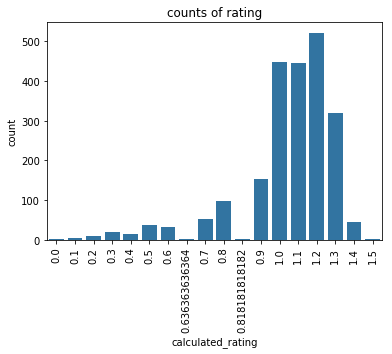

In [80]:
base_color = sb.color_palette()[0]
sb.countplot(data = archive_clean, x= 'calculated_rating', color = base_color)
plt.xticks(rotation= 90)
plt.title('counts of rating')

In [74]:
archive_clean['dog_stages'].value_counts()

NaN      2114
doggo    90  
Name: dog_stages, dtype: int64

Text(0.5,1,'favorite_count vs retweet_count')

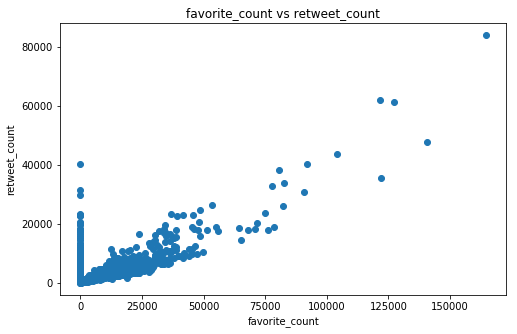

In [79]:
plt.figure(figsize= [8,5])
plt.scatter(data= archive_clean, x= 'favorites', y= 'retweets')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('favorite_count vs retweet_count')

### Insights

- The ratings with highest frequencies are 1.0,1.1,1.2,1.3.
- The rating frequency gradually increased with increase in rating values.
- Unusually the highest ratings 1.4 and 1.5 have low frequencies.
- The graph between favorite_count and retweet_count follows a linear trend stating the point favorites have the most retweets.
- There are outliers for the most favorite.
